In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("C:/Users/DSP/Downloads/fish data set 2.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [12]:
df.size

1113

In [13]:
df.shape

(159, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [15]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Text(0.5, 1.0, 'Types of Species')

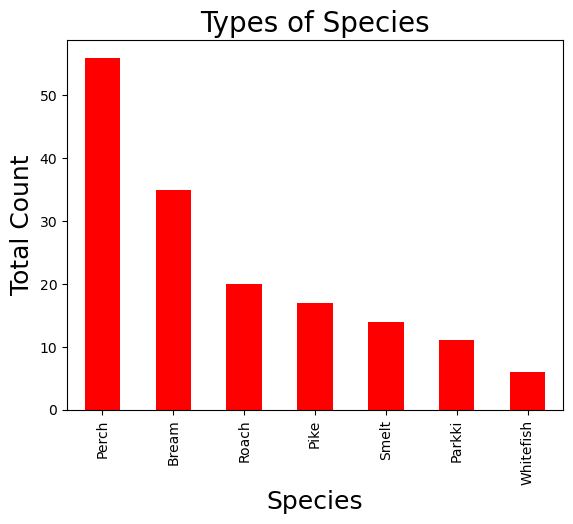

In [16]:
s_count=df["Species"].value_counts()
s_count.plot(kind="bar",color="red")
plt.xlabel("Species", fontsize=18)
plt.ylabel("Total Count",fontsize=18)
plt.title("Types of Species",fontsize=20)

In [17]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: >

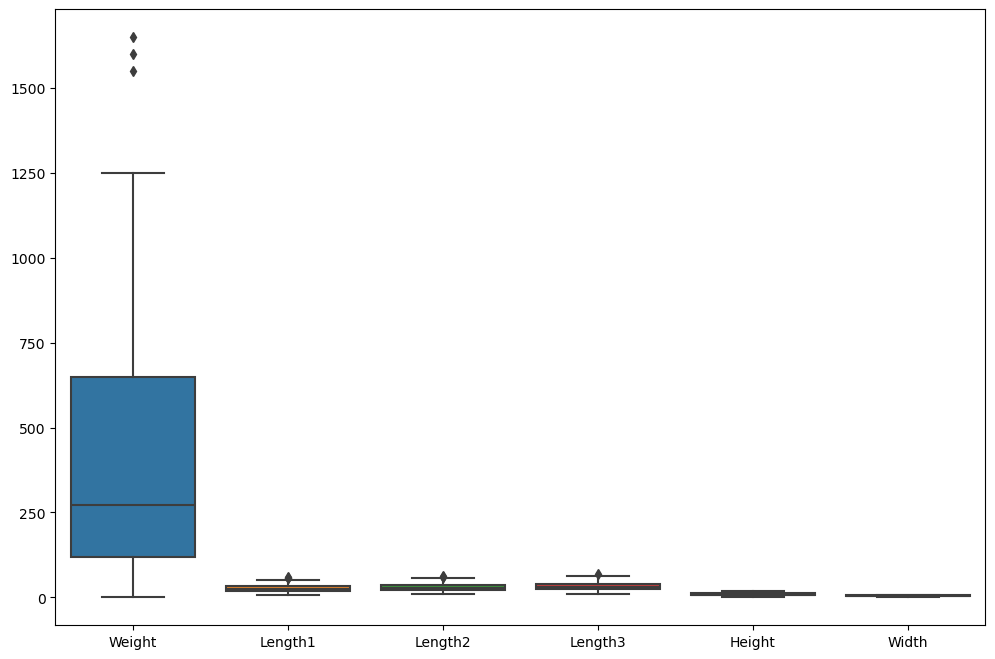

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

In [19]:
for cols in df.columns[::]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3-Q1
    
        low = Q1-1.5*(Q3-Q1)
        high = Q3+1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high)]

<Axes: >

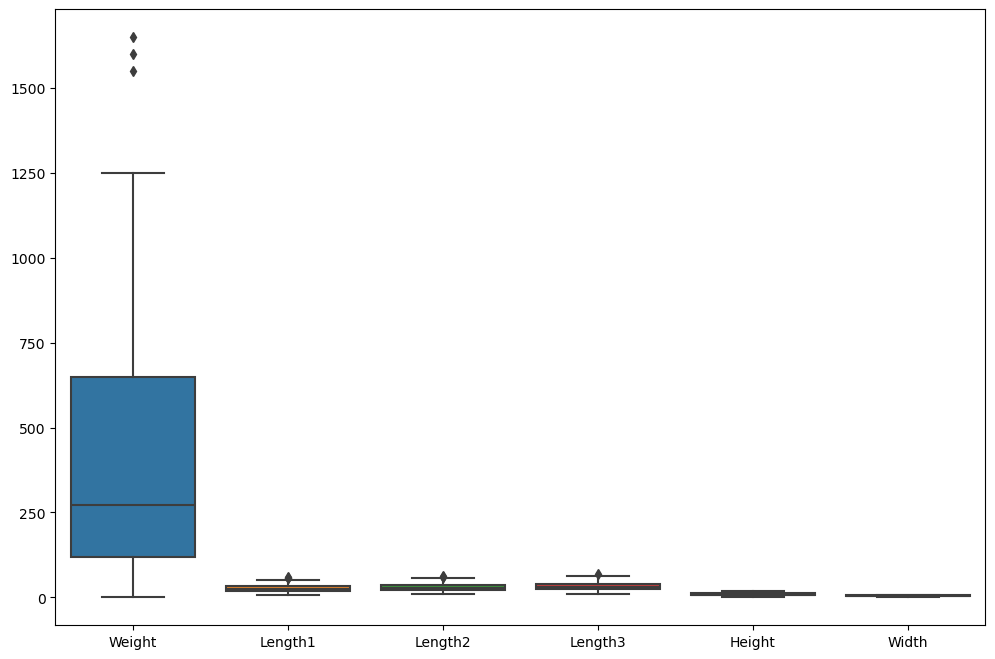

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

In [21]:
df=df.drop(columns="Species")

In [22]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [23]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop("Weight",axis=1)
y=df["Weight"]

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
X_train.shape

(111, 5)

In [28]:
X= df['Width'].values.reshape(-1,1)

In [29]:
y= df['Weight'].values

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X,y)

LinearRegression()

In [33]:
model.coef_

array([188.24855477])

In [34]:
model.intercept_

-433.2588525217859

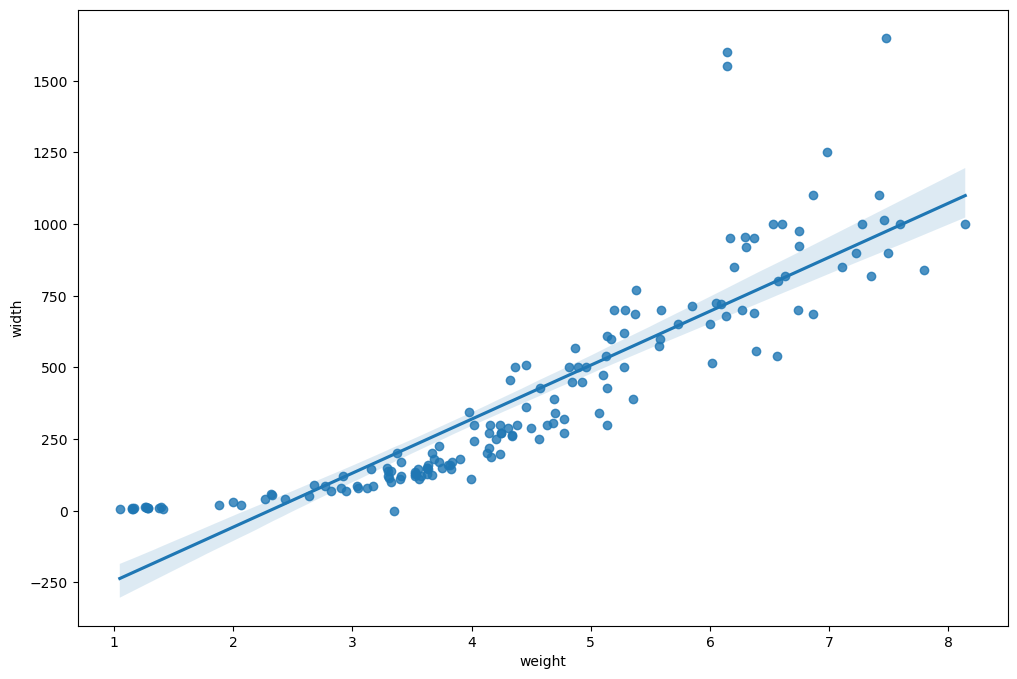

In [35]:
plt.figure(figsize=(12,8))
sns.regplot(x=X,y=y)
plt.xlabel('weight')
plt.ylabel("width")
plt.show()

In [36]:
X= df['Width'].values.reshape(-1,1)

In [37]:
y= df['Weight'].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model1=LinearRegression()

In [42]:
model1.fit(X_train,y_train)

LinearRegression()

In [43]:
model1.coef_

array([191.58420809])

In [44]:
model1.intercept_

-454.2804928188701

In [45]:
y_pred=model1.predict(X_test)
y_pred

array([ 153.92273419,  954.13165454,  728.02397215,  489.73153413,
        837.15033708,  460.26588293,  192.43116001,  -10.91631845,
        -19.76750887,  311.09841851,  351.17783484,  187.83313902,
        342.32664442,  733.23506261,  182.73699908,  720.24565331,
       -209.58914224, -253.57687642,  468.12083546,  571.65294151,
        883.91604228,  815.92280683,  376.23704926,  722.81288169,
       -234.26518825,   49.89250919,  860.75351152,  529.94505941,
       1000.954835  , -234.26518825,  373.84224666,  529.27451468])

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 149.12101311439352 
MSE= 47586.50422651288 
r2= 0.7050488612148351 
RMSE= 218.14331121194817


In [47]:
y_pre=model1.predict(X_train)

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 107.50662501461903 
MSE= 22233.18754093134 
r2= 0.8122065238415205 
RMSE= 149.10797276112146


In [49]:
X= df['Width'].values.reshape(-1,1)

In [50]:
y= df['Weight'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model2=LinearRegression()

In [55]:
model2.fit(X_train,y_train)

LinearRegression()

In [56]:
model2.coef_

array([191.58420809])

In [57]:
model2.intercept_

-454.2804928188701

In [58]:
y_pred=model2.predict(X_test)
y_pred

array([ 153.92273419,  954.13165454,  728.02397215,  489.73153413,
        837.15033708,  460.26588293,  192.43116001,  -10.91631845,
        -19.76750887,  311.09841851,  351.17783484,  187.83313902,
        342.32664442,  733.23506261,  182.73699908,  720.24565331,
       -209.58914224, -253.57687642,  468.12083546,  571.65294151,
        883.91604228,  815.92280683,  376.23704926,  722.81288169,
       -234.26518825,   49.89250919,  860.75351152,  529.94505941,
       1000.954835  , -234.26518825,  373.84224666,  529.27451468])

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 149.12101311439352 
MSE= 47586.50422651288 
r2= 0.7050488612148351 
RMSE= 218.14331121194817


In [60]:
y_pre=model2.predict(X_train)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 107.50662501461903 
MSE= 22233.18754093134 
r2= 0.8122065238415205 
RMSE= 149.10797276112146


In [62]:
X=df[['Height','Width']].values

In [63]:
y= df['Weight'].values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model3=LinearRegression()

In [68]:
model3.fit(X_train,y_train)

LinearRegression()

In [69]:
model3.coef_

array([  7.04730578, 176.75452792])

In [70]:
model3.intercept_

-453.141048634486

In [71]:
y_pred=model3.predict(X_test)
y_pred

array([ 147.56577334,  933.85936025,  700.55215491,  513.65948438,
        813.09144491,  450.99568176,  182.75093439,    2.25581946,
        -23.03519278,  291.91203657,  345.08308776,  184.90214153,
        322.02889038,  761.48039293,  180.72760956,  739.48221442,
       -212.70921818, -255.7191499 ,  499.14095178,  560.22314369,
        856.78127718,  797.21322133,  363.59927988,  700.49290638,
       -237.97558546,   44.3702141 ,  836.78376519,  513.55471365,
        977.46338695, -234.62106791,  362.18478437,  564.45187807])

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 146.5372162390774 
MSE= 48354.78072538038 
r2= 0.7002869222591135 
RMSE= 219.89720490579313


In [73]:
y_pre=model3.predict(X_train)

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 104.31658553660179 
MSE= 21890.401317252486 
r2= 0.815101880902013 
RMSE= 147.95405137154063


In [75]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [ ]:
### Multi Regression

In [76]:
X=df[[ 'Length1', 'Length2', 'Length3', 'Height', 'Width']].values

In [77]:
y= df['Weight'].values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model4=LinearRegression()

In [82]:
model4.fit(X_train,y_train)

LinearRegression()

In [83]:
model4.coef_

array([ 63.81694501, -10.75828422, -28.61681838,  27.58208889,
        41.20869372])

In [84]:
model4.intercept_

-509.4756051185872

In [85]:
y_pred=model4.predict(X_test)
y_pred

array([  89.42407787,  870.59971093,  940.40318415,  466.52820514,
        747.37885096,  352.83686151,  354.3560225 ,   15.19873723,
        -93.67152345,  174.63662747,  389.76941001,  146.7526642 ,
        394.80294868,  727.24073006,  190.87997433,  660.81078991,
       -191.88487357, -239.34087675,  547.43168929,  512.78668736,
       1080.70664269,  791.92710368,  364.92196548, 1105.27415309,
       -215.92042022,   16.39787283,  734.54441702,  424.97471031,
        963.97277978, -180.67782473,  662.83206508,  640.20427201])

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 109.06327142039422 
MSE= 21303.01327901212 
r2= 0.8679594534557271 
RMSE= 145.95551815197712


In [87]:
y_pre=model4.predict(X_train)

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 86.13313427475353 
MSE= 13170.813293486503 
r2= 0.8887522174827779 
RMSE= 114.76416380336896


In [89]:
from sklearn.linear_model import Lasso
lasso_reg =Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [91]:
lasso_reg.score(X_test,y_test)

0.8690935110940595

In [92]:
lasso_reg.score(X_train,y_train)

0.8885549775969757